In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dta_wb = pd.read_csv(("/Users/utkarshtyagi/Documents/VSC/Jupyter/BT5126/WorldBankData.csv"))

In [4]:
# Check the first few rows
print(dta_wb.head())

  Country.Name Country.Code  Years.of.Compulsory.Education  \
0  Afghanistan          AFG                            9.0   
1      Albania          ALB                            9.0   
2      Algeria          DZA                           10.0   
3      Andorra          AND                           10.0   
4       Angola          AGO                            6.0   

   Health.Expenditure.per.capita  Diabetes.Prevalence  GDP.per.capita.PPP  \
0                     162.781158                 9.59         1934.636754   
1                     759.666984                10.08        12930.067676   
2                     998.153754                 6.73        15266.485208   
3                    4978.706602                 7.97                 NaN   
4                     185.820401                 3.94         6650.584940   

   Tertiary.Education.Expenditure.per.student  Human.Capital.Index  \
0                                         NaN                0.389   
1                       

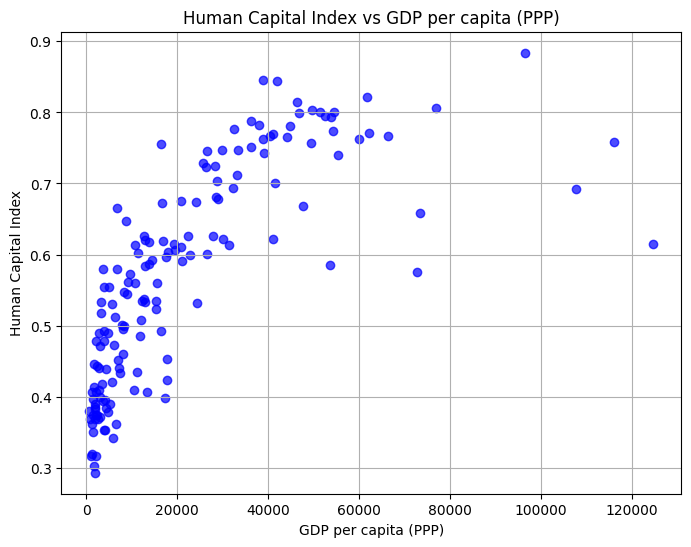

In [5]:
plt.figure(figsize=(8,6))

plt.scatter(dta_wb['GDP.per.capita.PPP'], dta_wb['Human.Capital.Index'], color='blue', alpha=0.7)
plt.xlabel('GDP per capita (PPP)')
plt.ylabel('Human Capital Index')
plt.title('Human Capital Index vs GDP per capita (PPP)')
plt.grid(True)
plt.show()

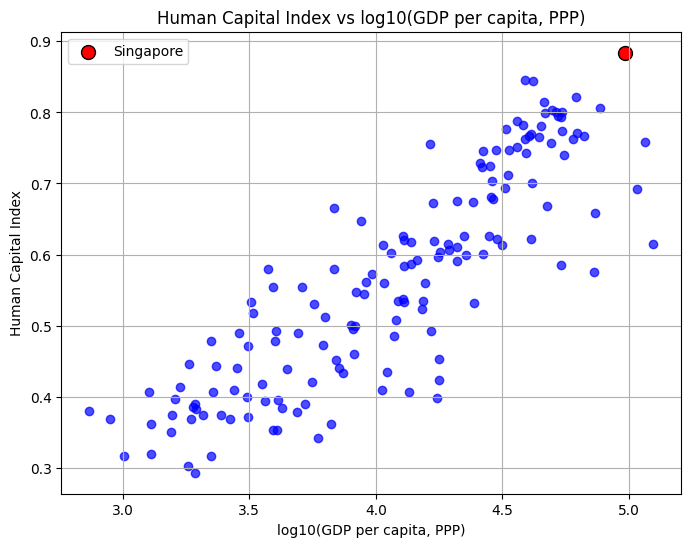

In [7]:
# Create figure
plt.figure(figsize=(8,6))

# Scatter plot with log10 transformation
plt.scatter(np.log10(dta_wb['GDP.per.capita.PPP']), dta_wb['Human.Capital.Index'], color='blue', alpha=0.7)

# Highlight Singapore
singapore = dta_wb[dta_wb['Country.Name'] == 'Singapore']
plt.scatter(np.log10(singapore['GDP.per.capita.PPP']), singapore['Human.Capital.Index'],
            color='red', s=100, label='Singapore', edgecolor='black')

plt.xlabel('log10(GDP per capita, PPP)')
plt.ylabel('Human Capital Index')
plt.title('Human Capital Index vs log10(GDP per capita, PPP)')
plt.legend()
plt.grid(True)
plt.show()

Question 4 -> C part

In [10]:
import statsmodels.api as sm

# Keep relevant columns and drop missing values

dta_wb = dta_wb[['GDP.per.capita.PPP', 'Human.Capital.Index']].dropna()

# Log10 transform GDP per capita
dta_wb['log_gdp'] = np.log10(dta_wb['GDP.per.capita.PPP'])

# Define X and y
X = dta_wb['log_gdp']
y = dta_wb['Human.Capital.Index']


In [11]:
# Add intercept (important – statsmodels does NOT add it automatically)
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Show regression table (like summary(lm) in R)
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Human.Capital.Index   R-squared:                       0.746
Model:                             OLS   Adj. R-squared:                  0.744
Method:                  Least Squares   F-statistic:                     455.2
Date:                 Thu, 05 Feb 2026   Prob (F-statistic):           5.57e-48
Time:                         14:50:09   Log-Likelihood:                 181.48
No. Observations:                  157   AIC:                            -359.0
Df Residuals:                      155   BIC:                            -352.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4326      0.047     -9.15